In [144]:
#%pip install numpy
#%pip install pandas
#%pip install mplfinance
#%pip install matplotlib
#%pip install ta

In [149]:
import numpy as np
import pandas as pd
import mplfinance as mpf
import matplotlib.pyplot as plt
import ta

In [146]:
data = np.load('npz/BTCUSD/BTCUSD2023-05-01.npz', allow_pickle=True)['data']
df = pd.DataFrame(data, columns=['timestamp', 'open', 'high', 'low', 'close', 'vol'])
df

,timestamp,open,high,low,close,vol
0,2023-05-01 00:00:00,29237.5,29239.5,29237.0,29239.0,59395.0
1,2023-05-01 00:00:05,29239.0,29250.0,29239.0,29249.5,144575.0
2,2023-05-01 00:00:10,29250.0,29259.0,29248.0,29257.0,285878.0
3,2023-05-01 00:00:15,29257.5,29259.0,29253.0,29254.0,108818.0
4,2023-05-01 00:00:20,29259.0,29259.0,29254.0,29259.0,42836.0
...,...,...,...,...,...,...
17274,2023-05-01 23:59:30,28080.5,28081.0,28080.5,28081.0,50002.0
17275,2023-05-01 23:59:35,28080.5,28081.0,28080.5,28081.0,382.0
17276,2023-05-01 23:59:40,28080.5,28081.0,28073.5,28074.0,161262.0
17277,2023-05-01 23:59:45,28074.0,28074.0,28062.0,28062.5,864790.0


In [148]:
data = np.load('npz/BTCUSD_1H.npz', allow_pickle=True)['data']
df = pd.DataFrame(data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])

# Преобразование 'timestamp' в datetime и установка его как индекс DataFrame
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.set_index('timestamp', inplace=True)

# Преобразование всех столбцов с ценами и объемом в числовой формат
for column in ['open', 'high', 'low', 'close', 'volume']:
    df[column] = pd.to_numeric(df[column], errors='coerce')
df['log_return'] = np.log(df['close'] / df['close'].shift(1))
df['log_return'].std()

0.004843870060288521

/home/stan/src/inv/venv/lib/python3.10/site-packages/ta/trend.py:1030: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self._psar[i] = high2


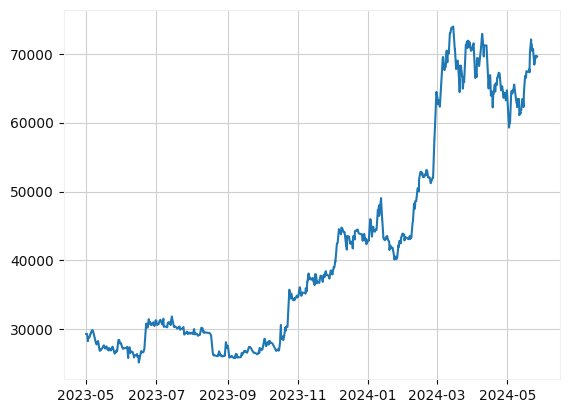

In [153]:
df = ta.add_all_ta_features(df, "open", "high", "low", "close", "volume", fillna=True)
plt.plot(df.volatility_dch, label='High DC')

<Axes: xlabel='timestamp'>

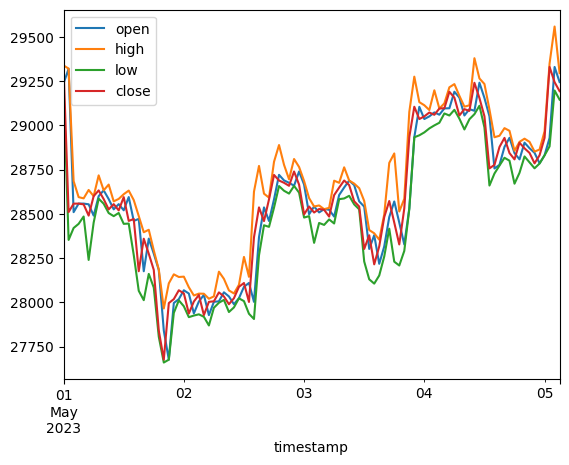

In [ ]:
df[['open', 'high', 'low', 'close']][:100].plot()

In [157]:
df

,open,high,low,close,volume,log_return,volume_adi,volume_obv,volume_cmf,volume_fi,...,momentum_ppo,momentum_ppo_signal,momentum_ppo_hist,momentum_pvo,momentum_pvo_signal,momentum_pvo_hist,momentum_kama,others_dr,others_dlr,others_cr
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-05-01 00:00:00,29237.5,29339.0,29220.0,29320.0,13415519.0,NaN,9.131572e+06,1.341552e+07,0.680672,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,29320.000000,0.000000,0.000000,0.000000
2023-05-01 01:00:00,29320.5,29321.0,28352.5,28510.0,171567808.0,-0.028015,-1.066346e+08,-1.581523e+08,-0.576455,-1.389699e+11,...,-0.220832,-0.044166,-0.176665,50.202484,10.040497,40.161987,28954.114078,-2.762619,-2.801497,-2.762619
2023-05-01 02:00:00,28509.5,28685.0,28420.0,28557.5,39747031.0,0.001665,-1.051347e+08,-1.184053e+08,-0.467826,-1.188474e+11,...,-0.379056,-0.111144,-0.267911,45.172583,17.066914,28.105669,28776.043268,0.166608,0.166470,-2.600614
2023-05-01 03:00:00,28558.0,28594.5,28443.5,28558.0,16790210.0,0.000018,-9.646165e+07,-1.016150e+08,-0.399393,-1.018680e+11,...,-0.499078,-0.188731,-0.310347,36.322535,20.918038,15.404497,28678.243402,0.001751,0.001751,-2.598909
2023-05-01 04:00:00,28558.0,28587.5,28485.0,28553.5,13609368.0,-0.000158,-9.188094e+07,-1.152244e+08,-0.360134,-8.732415e+10,...,-0.589074,-0.268800,-0.320274,27.979230,22.330277,5.648953,28622.304337,-0.015757,-0.015759,-2.614256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-05-26 19:00:00,68797.5,68919.5,68797.5,68897.5,5497105.0,0.001452,1.057269e+10,-3.588878e+09,-0.148139,-1.028104e+09,...,-0.047781,0.030467,-0.078248,-2.298696,-4.475355,2.176660,68993.021740,0.145354,0.145249,134.984652
2024-05-26 20:00:00,68897.5,68904.0,68707.0,68713.0,6195792.0,-0.002681,1.056687e+10,-3.595074e+09,-0.157569,-1.044536e+09,...,-0.075402,0.009293,-0.084695,-4.466981,-4.473681,0.006699,68965.949137,-0.267789,-0.268148,134.355389
2024-05-26 21:00:00,68713.0,68713.0,68102.0,68518.5,36380689.0,-0.002835,1.058009e+10,-3.631454e+09,-0.042828,-1.906180e+09,...,-0.118720,-0.016310,-0.102410,17.491057,-0.080733,17.571790,68915.330404,-0.283061,-0.283463,133.692019


In [156]:
df.volatility_dch

timestamp
2023-05-01 00:00:00    29339.0
2023-05-01 01:00:00    29339.0
2023-05-01 02:00:00    29339.0
2023-05-01 03:00:00    29339.0
2023-05-01 04:00:00    29339.0
                        ...   
2024-05-26 19:00:00    69599.0
2024-05-26 20:00:00    69599.0
2024-05-26 21:00:00    69599.0
2024-05-26 22:00:00    69599.0
2024-05-26 23:00:00    69599.0
Name: volatility_dch, Length: 9408, dtype: float64

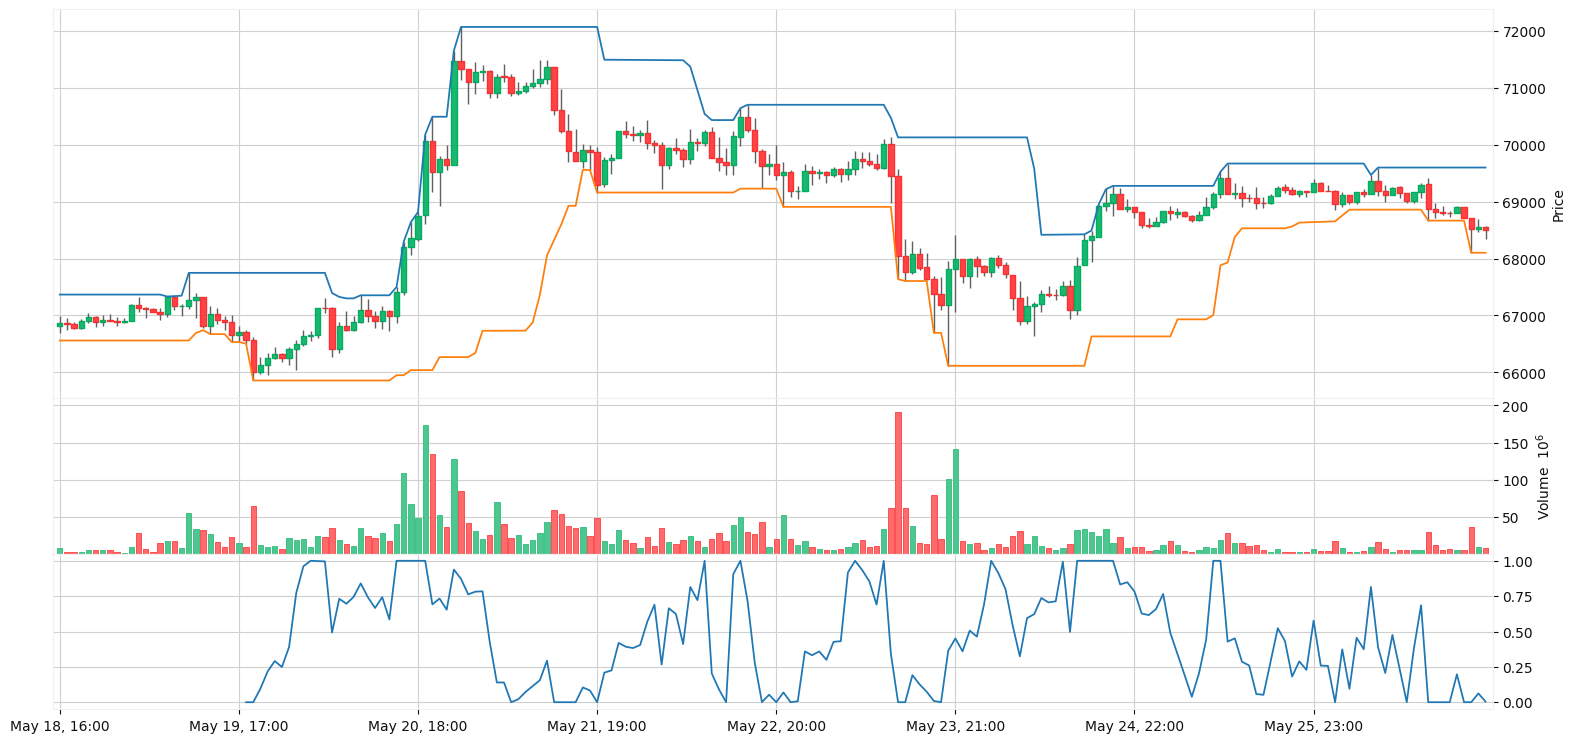

In [170]:
customstyle = mpf.make_mpf_style(base_mpf_style='yahoo', facecolor='w')
#wconfig = {}
points = -200
# apdict = [mpf.make_addplot(df[points:].volatility_bbh),
#     mpf.make_addplot(df[points:].volatility_bbl),
#     mpf.make_addplot(df[points:].volatility_bbm)]
apdict = [mpf.make_addplot(df[points:].volatility_dch),
    mpf.make_addplot(df[points:].volatility_dcl),
    mpf.make_addplot(ta.momentum.stochrsi(df[points:]['close']),panel=2)]
fix, ax = mpf.plot(
    df[points:],
    type='candle',
    volume=True, 
    style=customstyle,
    figsize=(20,10), 
    returnfig=True, 
    xrotation=0,
    #return_width_config=wconfig,
    update_width_config={'volume_width':0.75, 'candle_width': 0.75, 'candle_linewidth': 1},
    addplot=apdict)
#wconfig
ax[0].margins(x=0)

In [ ]:
#ax[1].get_xticklabels()
ax[1].get_xticks()

array([-20.,   0.,  20.,  40.,  60.,  80., 100., 120.])

In [ ]:
help(mpf.plot)

Help on function plot in module mplfinance.plotting:

plot(data, **kwargs)
    Given a Pandas DataFrame containing columns Open,High,Low,Close and optionally Volume
    with a DatetimeIndex, plot the data.
    Available plots include ohlc bars, candlestick, and line plots.
    Also provide visually analysis in the form of common technical studies, such as:
    moving averages, renko, etc.
    Also provide ability to plot trading signals, and/or addtional user-defined data.

